In [2]:
!pip install requests
import requests
import os
import json


In [3]:
api_key = 'HDEV-0465ed95-8059-4c6d-b08f-40831d5c957d'
name = "GEA joli"
tag = "brrr"
map = "Bind" #capitalize correctly please
size = 10 #between 1 and 10
mode = "competitive" #no caps


allMaps = {"/Game/Maps/Ascent/Ascent": "Ascent", 
"/Game/Maps/Bonsai/Bonsai": "Split",
"/Game/Maps/Canyon/Canyon": "Fracture",
"/Game/Maps/Duality/Duality": "Bind",
"/Game/Maps/Foxtrot/Foxtrot": "Breeze",
"/Game/Maps/Jam/Jam": "Lotus",
"/Game/Maps/Juliett/Juliett": "Sunset",
"/Game/Maps/Pitt/Pitt": "Pearl",
"/Game/Maps/Port/Port": "Icebox",
"/Game/Maps/Triad/Triad": "Haven",
"/Game/Maps/HURM/HURM_Alley/HURM_Alley": "District",
"/Game/Maps/HURM/HURM_Bowl/HURM_Bowl": "Kasbah",
"/Game/Maps/HURM/HURM_Helix/HURM_Helix": "Drift",
"/Game/Maps/HURM/HURM_Yard/HURM_Yard": "Piazza",
"/Game/Maps/Poveglia/Range": "The Range"
}

In [4]:
def get_puuid(name, tag, api_key):
    url = f"https://api.henrikdev.xyz/valorant/v1/account/{name}/{tag}"
    headers = {'Authorization': f'{api_key}'}
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch puuid: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message

puuid = get_puuid(name, tag, api_key)['data']['puuid']
print(puuid)

996b0f5f-c32a-5bdb-be9d-60bb34a3b148


In [5]:
def get_raw(puuid,api_key,queue, startIndex, endIndex):
    url = f"https://api.henrikdev.xyz/valorant/v1/raw"
    headers = {
        'Authorization': f'{api_key}',
    }
    body = {
        "type": "matchhistory",
        "value": puuid,
        "region": "na",
        "queries": f"?startIndex={startIndex}&endIndex={endIndex}&queue={queue}"
    }
    response = requests.post(url, headers=headers, json=body)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch raw_data: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message

#CAN ONLY GET 25 ELEMENTS FROM THE API AT A TIME
#matchhistory: limit = 25 at a time
#competitiveupdates = 20 at at time


In [6]:
#OBSOLETE, DONT USE BECAUSE RIOT ONLY GIVE ME 14 GAMES OF HISTORY :(
def get_comp(puuid,api_key, mode, startIndex, endIndex):
    url = f"https://api.henrikdev.xyz/valorant/v1/raw"
    headers = {
        'Authorization': f'{api_key}',
    }
    body = {
        "type": "competitiveupdates",
        "value": puuid,
        "region": "na",
        "queries": f"?startIndex={startIndex}&endIndex={endIndex}&queue={mode}"
    }
    response = requests.post(url, headers=headers, json=body)
    if response.status_code == 200:

        return response.json()
    else:
        print(f"Failed to fetch raw_data: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message

In [7]:
def get_match_details(matchID,api_key, puuid):
    url = f"https://api.henrikdev.xyz/valorant/v1/raw"
    headers = {
        'Authorization': f'{api_key}',
    }
    body = {
        "type": "matchdetails",
        "value": matchID,
        "region": "na",
    }
    response = requests.post(url, headers=headers, json=body)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch raw_data: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message

In [8]:
#CREATE AN ARRAY OF ALL MATCH IDS THAT I HAVE ACCESS TO

history = []

match_history = get_raw(puuid, api_key, mode ,0 ,25)
total_elements = match_history['Total']
history.extend([match['MatchID'] for match in match_history['History']])

if total_elements > 25:
    for i in range(25, total_elements, 25):
        next_batch = get_raw(puuid, api_key, mode, i, i+25)
        history.extend([match['MatchID'] for match in next_batch['History']])




In [9]:

print()

print("Match History[",len(history),"]:")
for index, match in enumerate(history):
    print(f"{index}: {match}")




Match History[ 88 ]:
0: 0aa5c2e0-47b3-4690-98f3-cd02751d67be
1: 928ea308-a314-4754-a148-52e2da803544
2: 7b097ddc-8228-4aba-9bc1-38b84a66e1ac
3: c2cbfafd-f6e1-44af-a609-b0447d6feff9
4: 32070716-0d03-4187-a2f5-5476fec8e577
5: 668efbc3-0d8b-4218-9667-fa8c87c7cd21
6: 6296a777-c28e-42bb-9f2e-5a0eed406a75
7: 5492a62b-134a-4cd2-9b34-89b8357a236e
8: 3daf9c02-a79a-4f40-8ab0-4c11adba93e5
9: 2541f720-e9ce-46d2-8ec1-c49ead85a526
10: 16b9ea5d-3f4f-409f-8876-4cf5bea7188d
11: b2fb8d5f-5c1d-406a-ac94-cd0dc0ee33fd
12: 8562a896-e51f-4762-91e3-273b533ab32f
13: 6eaf104d-a14f-46be-87c1-f09d7f7c4ce5
14: 45b7fcfa-f6ab-4037-ac6d-0b8a719fbdea
15: 30c4c1ad-711f-40c8-8918-a0ac1459e250
16: 78a0d4d3-0612-4957-8522-724e145c595b
17: eba0a6e0-ab72-481e-bb93-f7c18ae8bd28
18: 1b10ef46-5f77-49e4-b731-25d761c337a0
19: e0641398-bc69-4a09-8827-eb169a59fe3b
20: 4f5a6196-5e7c-4c80-922a-822d0e94e3ac
21: b06c5fe6-4d51-4e0b-b2cc-4d14c9f6cebd
22: f17e9990-79f6-4564-8cb0-e5a5caeff59b
23: 7c897976-59a1-415d-95f7-c1775b363c73
24: 

In [10]:


from collections import deque




def get_all_location_data(puuid, all_match_ids):
    to_return_dict = {}

    for match_id in all_match_ids:
        curr_match = get_match_details(match_id, api_key, puuid)

        #if map no exist, make it exist
        map_id = curr_match['matchInfo']['mapId']
        map_name = allMaps[map_id]
        if map_name not in to_return_dict:
            to_return_dict[map_name] = {

                'All_Kill_Times' : [0]*101,
                'All_Death_Times': [0]*101,

                "Attack": {
                    #make these all linkedlists which apparently is using deque()
                    "kill_info": [[] for _ in range(140)],
                    "death_info": [[] for _ in range(140)],
                    #WE ARE DITCHING THE PLANT INFO!, making a separate dictionary that gets ALL plant data and defuse data(not just specific player)
                },
                "Defense": {
                    "kill_info": [[] for _ in range(140)],
                    "death_info": [[] for _ in range(140)]
                }
            }

        #determine what team our player is on
        #so that we can tell if they are on attack or defense on a given round
        player_team = None
        for player in curr_match['players']:
            if player['subject'] == puuid:
                player_team = player['teamId']
                break
        if player_team == "Red":
            team_side = "Attack"
        elif player_team == "Blue":
            team_side = "Defense"

        round_count = 0
        kill_array_index = 0
        for round_result in curr_match['roundResults']:
            print("\n")
            
            round_count += 1
            print('currently examining round ', round_count)
            print('player is on ', team_side)

            if round_count > 24 or ( round_count % 12 == 1 and round_count > 1):  
                if team_side == "Attack":
                    team_side = "Defense"
                else:
                    team_side = "Attack"
                print('--------------SWITCHING SIDES: player is now on ', team_side)


            #get specified player's stats
            for player_stat in round_result['playerStats']:
                if player_stat['subject'] == puuid:
                    print("player stats found")
                    curr_round_stats = player_stat
            
            #location data will need these things
            loadout_value = curr_round_stats['economy']['loadoutValue']
            weapon = curr_round_stats['economy']['weapon']
            armor  = curr_round_stats['economy']['armor']

            #determine where to put the next entry in the array
            array_spot = (int)(loadout_value/50)
            print(loadout_value, "->", array_spot)
        #calculate round length

            #calculate start time 
            round_start_time = curr_match['kills'][kill_array_index]['gameTime'] - curr_match['kills'][kill_array_index]['roundTime']
            
            #calculate start time of next round, if there is no next round, time = -1
            next_round_start_time = -1
            for kill_info in curr_match['kills']:
                if kill_info['round'] == round_count + 1:
                    next_round_start_time = kill_info['gameTime'] - kill_info['roundTime']
                    break
        

            #subtract the buy phase time
            buy_phase = 0
            if(round_count == 1 or 13 or 25):
                buy_phase = 45000
            else:
                buy_phase = 30000

            if(next_round_start_time == -1):
                round_length = curr_match['matchInfo']['gameLengthMillis'] - round_start_time #might be wrong because gameLengthMillis might not start from the start of round 1
            else:
                round_length = next_round_start_time - round_start_time - buy_phase
        #round length calculated
            print('round start  = ', round_start_time)
            print('next round start  = ', next_round_start_time)
            print('buy phase    =', buy_phase)
            print("round length = ", round_length)



            
            #loop through all kills in the current round
            while(kill_array_index < len(curr_match['kills']) and curr_match['kills'][kill_array_index]['round']+1 == round_count):
                print('currently examining kills on round ', curr_match['kills'][kill_array_index]['round']+1, 'should match ', round_count)
                curr_kill_info = curr_match['kills'][kill_array_index]

                if(curr_kill_info['victim'] == puuid):#our player died!

                    death_time_percentage = (int)(round(curr_kill_info['roundTime']/round_length, 2)*100)
                    print("death_time[0,100]: ", death_time_percentage)#DBUG

                    print('INSERTING INTO SLOT: ', array_spot)
                    to_return_dict[map_name][team_side]['death_info'][array_spot].append({

                        'Location': {'x': curr_kill_info['victimLocation']['x'], 'y':curr_kill_info['victimLocation']['y']},
                        'Armor' : armor,
                        
                    })

                    #add to the death time
                    to_return_dict[map_name]['All_Death_Times'][death_time_percentage]+=1
                
                if(curr_kill_info['killer'] == puuid):#our player got a kill!
                    
                    print(curr_kill_info['roundTime']/round_length)
                    kill_time_percentage = (int)(round(curr_kill_info['roundTime']/round_length,2)*100)
                    print("kill_time[0,100]: ", kill_time_percentage)#DBUG

                    #add kill info (a bit more complicated)
                    for player_loc in curr_kill_info['playerLocations']:

                        if player_loc['subject'] == puuid:

                            print('INSERTING INTO SLOT: ', array_spot)
                            to_return_dict[map_name][team_side]['kill_info'][array_spot].append({
                                'Location': {'x': player_loc['location']['x'], 'y': player_loc['location']['y']},
                                'ViewRadians': player_loc['viewRadians'],
                                'Weapon': weapon
                            })

                    #add to the kill time
                    to_return_dict[map_name]['All_Kill_Times'][kill_time_percentage]+=1
                


                kill_array_index += 1
        



    return to_return_dict


#TESTING CODE FOR 3 ELEMENTs
history = history[:3]
print(history)
test_allData = get_all_location_data(puuid, history) 



            

            
        

        
        



['0aa5c2e0-47b3-4690-98f3-cd02751d67be', '928ea308-a314-4754-a148-52e2da803544', '7b097ddc-8228-4aba-9bc1-38b84a66e1ac']


currently examining round  1
player is on  Attack
player stats found
800 -> 16
round start  =  55031
next round start  =  223157
buy phase    = 45000
round length =  123126
currently examining kills on round  1 should match  1
0.101124051784351
kill_time[0,100]:  10
INSERTING INTO SLOT:  16
currently examining kills on round  1 should match  1
currently examining kills on round  1 should match  1
currently examining kills on round  1 should match  1
death_time[0,100]:  26
INSERTING INTO SLOT:  16
currently examining kills on round  1 should match  1
currently examining kills on round  1 should match  1
currently examining kills on round  1 should match  1
currently examining kills on round  1 should match  1


currently examining round  2
player is on  Attack
player stats found
400 -> 8
round start  =  164205
next round start  =  298029
buy phase    = 45000
round l

In [11]:
for map_name, kill_times in test_allData.items():
    print(f"Map: {map_name}, All_Kill_Times Length: {len(kill_times['All_Kill_Times'])}")


Map: Icebox, All_Kill_Times Length: 101
Map: Ascent, All_Kill_Times Length: 101
Map: Split, All_Kill_Times Length: 101


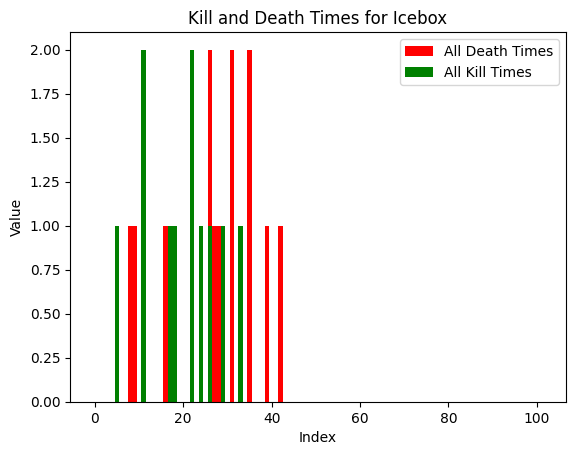

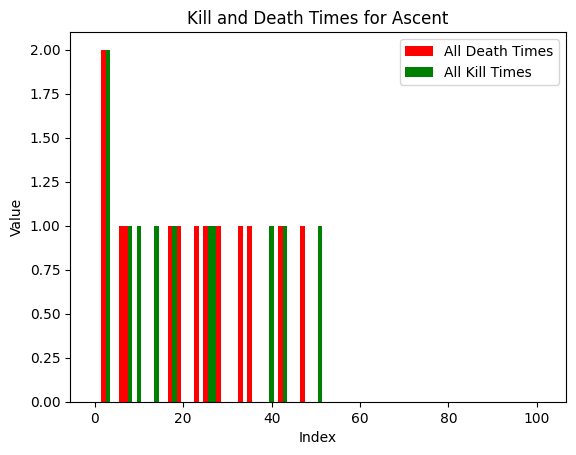

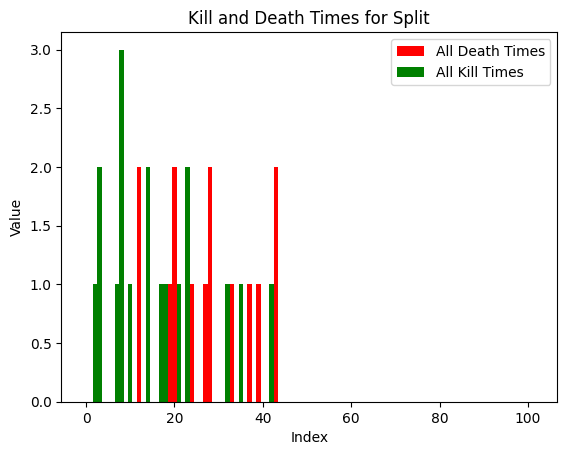

In [12]:
# import json
# print(type(test_allData))
# import json
# print(json.dumps(test_allData, indent=4))


# print(len(test_allData['Icebox']['Defense']['kill_info']))
# for index, kill_info in enumerate(test_allData['Icebox']['Defense']['kill_info']):
#     print(index, kill_info)



# import json
# print(json.dumps(test_allData, indent=4))
import matplotlib.pyplot as plt
import numpy as np

maps = list(test_allData.keys())

for map_name in maps:
    if 'All_Death_Times' in test_allData[map_name] and test_allData[map_name]['All_Death_Times'] and 'All_Kill_Times' in test_allData[map_name] and test_allData[map_name]['All_Kill_Times']:
        all_death_times = test_allData[map_name]['All_Death_Times']
        all_kill_times = test_allData[map_name]['All_Kill_Times']

        fig, ax = plt.subplots()
        bar_width = 1
        index = np.arange(len(all_death_times))  # Use the length of the death times array as the index range
        bar1 = ax.bar(index, all_death_times, bar_width, label='All Death Times', color='red')  # Set color of deaths to red
        bar2 = ax.bar(index + bar_width, all_kill_times, bar_width, label='All Kill Times', color='green')  # Set color of kills to green

        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        ax.set_title(f'Kill and Death Times for {map_name}')
        ax.legend()

        plt.show()



In [13]:
def get_matchlist(puuid, api_key,map,size,mode):
    url = f"https://api.henrikdev.xyz/valorant/v3/by-puuid/matches/na/{puuid}?mode={mode}&size={size}"
    headers = {
        'Authorization': f'{api_key}'
    }
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch matchlist: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message
    
matchlist = get_matchlist(puuid, api_key, map, size, mode)
print(type(matchlist))

print('Matches retrieved: ',len(matchlist['data']))


<class 'dict'>
Matches retrieved:  10


In [14]:
import json  # Make sure to import the json module

def export_to_file(data, folder, filename):
    os.makedirs(folder, exist_ok=True)
    file_path = os.path.join(folder, filename)
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, indent=4)  # Serialize data to JSON formatted string with indentation for readability
    print(f"Data exported to {file_path}")

# Assuming `puuid` and `matchlist` are already in a suitable dictionary format for JSON serialization
export_to_file(puuid, "data/name/", f"{name}.json")
export_to_file(matchlist, "data/name/", f"{name}_matchlist.json")

Data exported to data/name/GEA joli.json
Data exported to data/name/GEA joli_matchlist.json


In [15]:
#RIGHT NOW ALL OF THESE ADD DATA EVEN WHEN EVENTS OCCUR IN THE SAME MATCH
#we can use "matchid" to prevent double counting. This means we need to
#completely change the strucutre of the output.
#when doing this we can also add some other information that can be useful


# <map_name> -> {Attackers -> {death->[data],kill->[data],plant->[data]}, Defenders ->  {death->[data],kill->[data]}}
# data arrays are ordered by the teams median buy value(how good your guns are)
# 
#   make an array of size 6000/50 (prices of everything increment by 50 i think)
#   and have each slot contain a list of the datapoints(linkedlist for easy insertion)
# we may make an exception for pistol rounds (rounds 1 and 13) pistol round will be placed at buy value 0

#how we will create the structure

#compile all the match data into one big dictionary, if we put games for multiple players, we need to account for identical games(use 'matchid')
#   to check for duplicates, every time you add a match into the dictionary, check if the matchid is in the hashset and put the new matchid into the hashset,

#get the dictionary associated with the map name, if not exist create one
#for rounds[] 1-12, red = attack, blue = defender. for rounds 13 and after, red = defender, blue = attacker
#loop through rounds[], if bomb_planted = true, add plant data(location,sitename) to Attackers->plant->[]
# for every round, loop through playerstats[].
#       find the median buy value
#       loop through playerstats[] again, and this time get all the info for kill events

#

#we might also be able to store some damage events and headshots and bodyshot information!!

#i think first half attackers are always red

#returns <map_name> -> [{location(x,y)}, {location(x,y)}]
def get_all_death_info(player_match_history,death_locations_by_map):
    for match in player_match_history.get('data',[]):
        map_name = match['metadata']['map']
        if map_name not in death_locations_by_map:
            death_locations_by_map[map_name] = []
        
        for kill in match.get('kills', []):
            death_location = kill.get('victim_death_location', {"x": 0, "y": 0})
            if death_location:
                death_locations_by_map[map_name].append(death_location)
    
    return death_locations_by_map

#returns <map_name> -> [{location(x,y), view_radians}, {location(x,y), view_radians}]
def get_all_kill_info(player_match_history,kill_locations_by_map):
    for match in player_match_history.get('data',[]):
        map_name = match['metadata']['map']
        #make a new entry in the dictionary for the map if it doesn't exist
        if map_name not in kill_locations_by_map:
            kill_locations_by_map[map_name] = []
        
        #
        for kill in match.get('kills', []):
            killer_puuid = kill['killer_puuid']
            for player_location in kill.get('player_locations_on_kill', []):
                if player_location['player_puuid'] == killer_puuid:
                    kill_info = {
                        'location': player_location['location'],
                        'view_radians': player_location['view_radians']
                    }
                    kill_locations_by_map[map_name].append(kill_info)
    
    return kill_locations_by_map

def get_all_plant_locations(player_match_history, plant_locations_by_map):
    for match in player_match_history.get('data', []):
        map_name = match['metadata']['map']
        if map_name not in plant_locations_by_map:
            plant_locations_by_map[map_name] = []
        
        for round in match.get('rounds', []):
            if round.get('bomb_planted'):
                plant_events = round.get('plant_events', {})
                plant_location = plant_events.get('plant_location', {'x': 0, 'y': 0})
                plant_site = plant_events.get('plant_site', 'Unknown')
                plant_info = {
                    'location': plant_location,
                    'site': plant_site
                }
                plant_locations_by_map[map_name].append(plant_info)
    return plant_locations_by_map


death_locations_by_map = {}
kill_locations_by_map = {}
plant_locations_by_map = {}



In [26]:
import os
import json

data_folder = r'C:\Users\12406\ValorantAssistant\data\name'
for filename in os.listdir(data_folder):
    if filename.endswith('_matchlist.json'):
        with open(os.path.join(data_folder, filename), 'r') as file:
            matchlist = json.load(file)
            death_locations_by_map = get_all_death_info(matchlist, death_locations_by_map)
            kill_locations_by_map = get_all_kill_info(matchlist, kill_locations_by_map)
            plant_locations_by_map = get_all_plant_locations(matchlist, plant_locations_by_map)


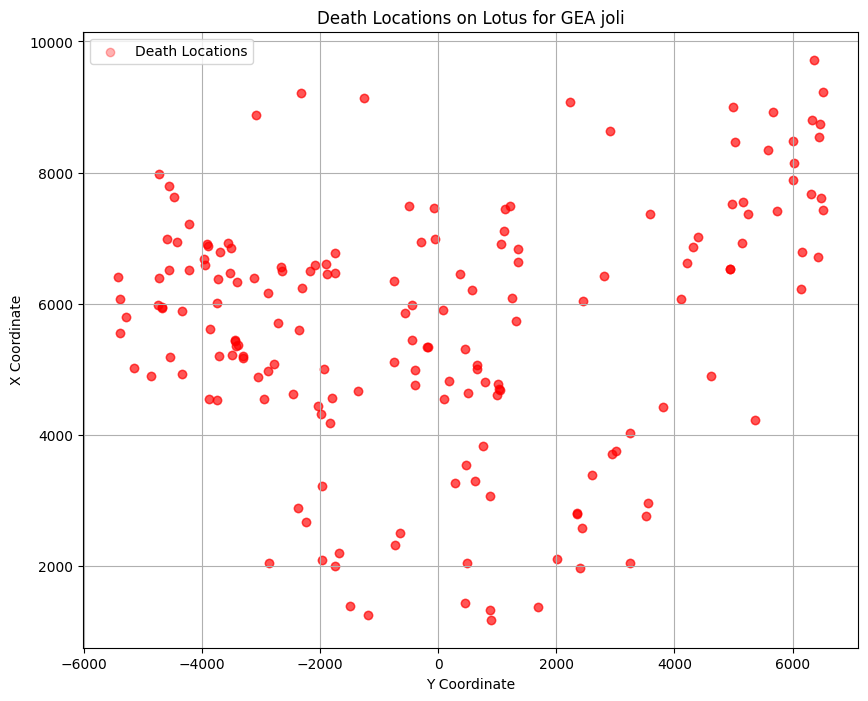

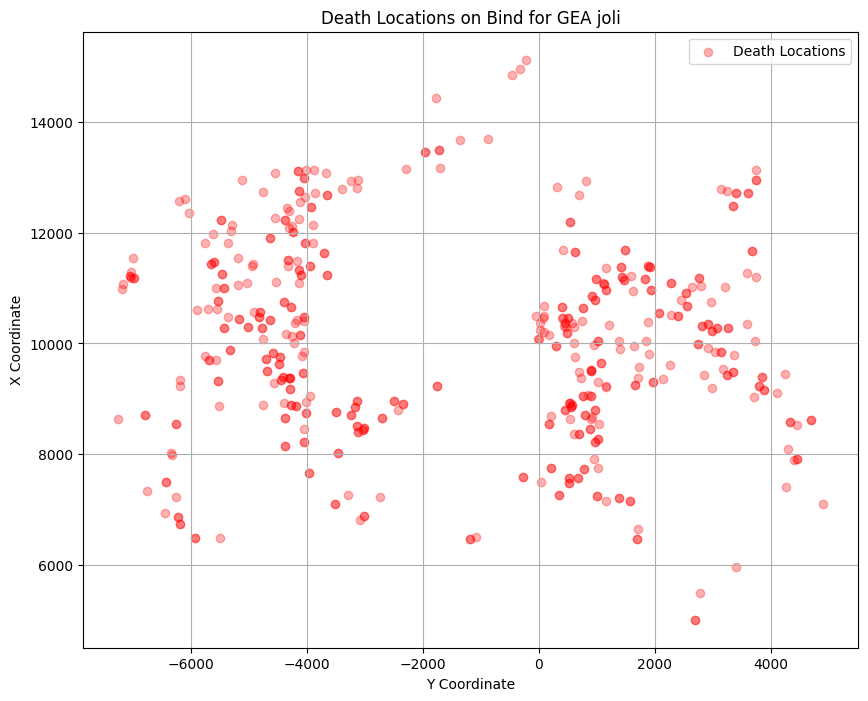

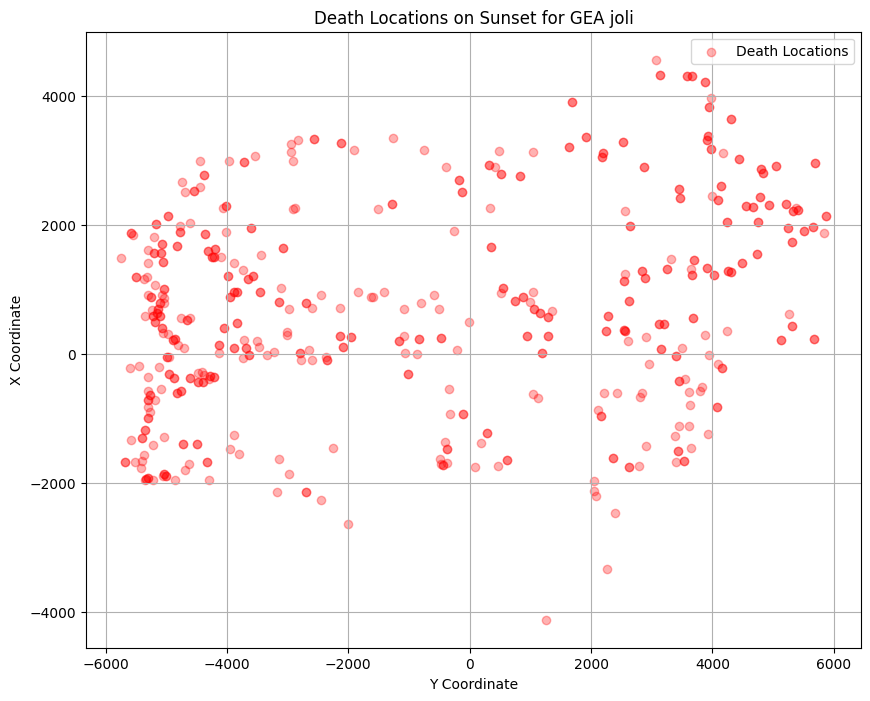

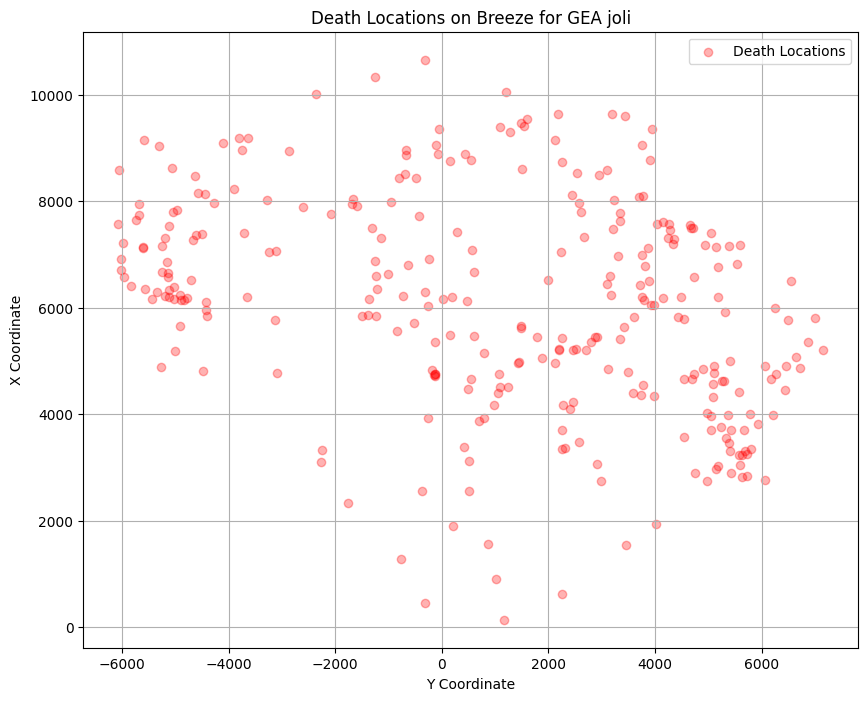

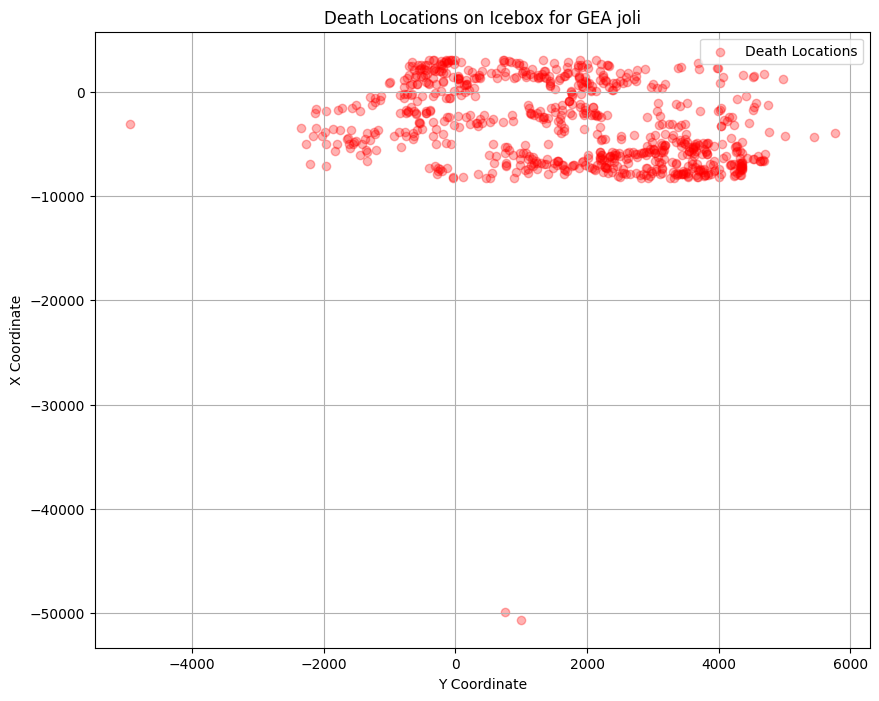

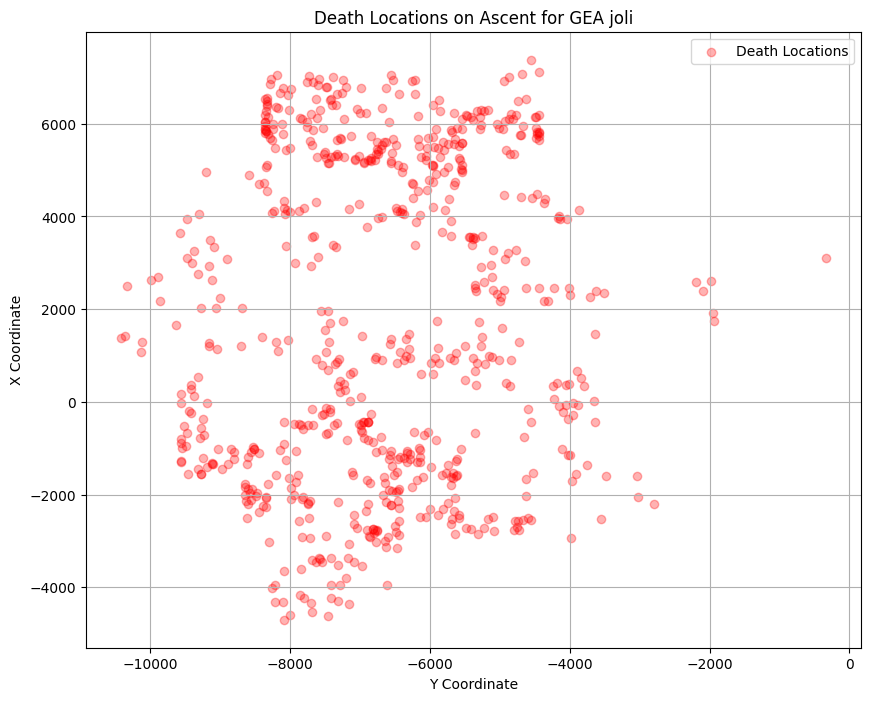

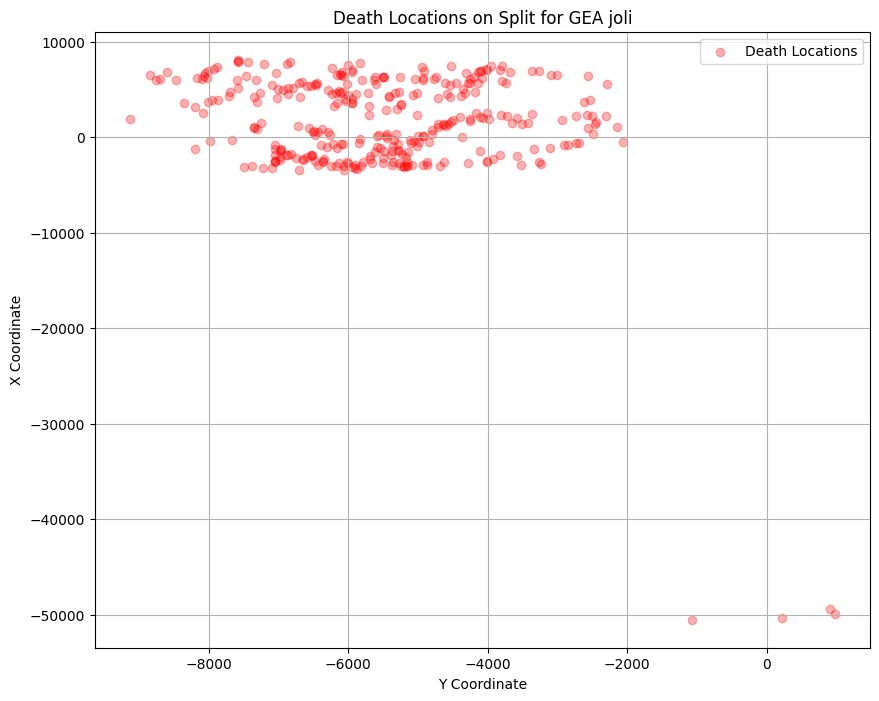

In [32]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

def plot_death_locations(death_data):
    for map_name, locations in death_data.items():
        x_coords = [loc['x'] for loc in locations]
        y_coords = [loc['y'] for loc in locations]
        
        plt.figure(figsize=(10, 8))
        # img = plt.imread("image (1).webp")  # Load the image file
        # img_rotated = np.rot90(img)  # Rotate the image 90 degrees counterclockwise
        # plt.imshow(img_rotated, extent=[min(y_coords), max(y_coords), min(x_coords), max(x_coords)], aspect='auto')  # Set the extent if needed to scale the image properly
        plt.scatter(y_coords, x_coords, c='red', label='Death Locations', alpha=0.3)  # Swap x and y coordinates for the scatter plot
        plt.title(f"Death Locations on {map_name} for {name}")
        plt.xlabel('Y Coordinate')  # Adjust labels to reflect the rotation
        plt.ylabel('X Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_death_locations(death_locations_by_map)



In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_kill_locations(kill_data):
    for map_name, locations in kill_data.items():
        x_coords = [loc['location']['x'] for loc in locations]
        y_coords = [loc['location']['y'] for loc in locations]
        radians = [loc['view_radians'] for loc in locations]
        
        plt.figure(figsize=(10, 8))
        plt.scatter(x_coords, y_coords, c='green', label='Kill Locations', alpha=0.3)
        
        # Drawing arrows to indicate the direction faced at the time of the kill
        for x, y, rad in zip(x_coords, y_coords, radians):
            dx = np.cos(rad) * 300  # length of the arrow along x-axis (scaled for visibility, increased length)
            dy = np.sin(rad) * 300  # length of the arrow along y-axis (scaled for visibility, increased length)
            plt.arrow(x, y, dx, dy, color='green', head_width=80, head_length=100, length_includes_head=True, alpha=0.5)
        
        plt.title(f"Kill Locations on {map_name}")
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.legend()
        plt.grid(True)
        plt.show()

plot_kill_locations(kill_locations_by_map)



In [19]:
import matplotlib.pyplot as plt
import numpy as np
print(plant_locations_by_map)


def plot_plant_sites(plant_data_by_map):
    for map_name, plant_data in plant_data_by_map.items():
        # Extracting plant locations and corresponding site labels
        plant_locations = [(event['location']['x'], event['location']['y']) for event in plant_data if 'location' in event and event['location']]
        plant_sites = [event['site'] for event in plant_data if 'location' in event and event['location']]
        
        print(f"Debug: Plant locations for {map_name} - {plant_locations}")  # Debug print
        
        # Setting up the plot only if there is data
        if plant_locations:
            plt.figure(figsize=(10, 8))
            site_positions = {}
            for (x, y), site in zip(plant_locations, plant_sites):
                if site in site_positions:
                    site_positions[site].append((x, y))
                else:
                    site_positions[site] = [(x, y)]
            
            for site, positions in site_positions.items():
                # Calculate the centroid of the positions for each site
                centroid_x = np.mean([pos[0] for pos in positions])
                centroid_y = np.mean([pos[1] for pos in positions])
                # Plot each position point
                for pos in positions:
                    plt.scatter(pos[0], pos[1], marker='o', color='purple')
                # Place the site letter at the centroid
                plt.text(centroid_x, centroid_y, site[0], fontsize=12, ha='center', color='black')
            
            plt.title(f"Plant Sites Visualization on {map_name}")
            plt.xlabel('X Coordinate')
            plt.ylabel('Y Coordinate')
            plt.grid(True)
            plt.show()
        else:
            print(f"No plant data available for {map_name}")  # Debug print

plot_plant_sites(plant_locations_by_map)

{}


In [20]:
def plot_game_events(plant_data_by_map, kill_data_by_map, death_data_by_map):
    combined_data_by_map = {}

    # Combine all data into one dictionary
    for map_name in set(plant_data_by_map.keys()).union(kill_data_by_map.keys(), death_data_by_map.keys()):
        combined_data_by_map[map_name] = {
            'plant': plant_data_by_map.get(map_name, []),
            'kill': kill_data_by_map.get(map_name, []),
            'death': death_data_by_map.get(map_name, [])
        }

    # Plotting the data
    for map_name, data in combined_data_by_map.items():
        plt.figure(figsize=(10, 8))

        # Invert y-axis
        plt.gca().invert_yaxis()

        # Plot plant data
        plant_locations = [(event['location']['x'], event['location']['y']) for event in data['plant'] if 'location' in event and event['location']]
        plant_sites = [event['site'] for event in data['plant'] if 'location' in event and event['location']]
        site_positions = {}
        for (x, y), site in zip(plant_locations, plant_sites):
            if site in site_positions:
                site_positions[site].append((x, y))
            else:
                site_positions[site] = [(x, y)]

        for site, positions in site_positions.items():
            centroid_x = np.mean([pos[0] for pos in positions])
            centroid_y = np.mean([pos[1] for pos in positions])
            for pos in positions:
                plt.scatter(pos[0], pos[1], marker='o', color='purple')
            plt.text(centroid_x, centroid_y, site, fontsize=20, ha='center', color='black')  # Plot full site name at centroid

        # Plot kill data
        for event in data['kill']:
            if 'location' in event and event['location']:
                x = event['location']['x']
                y = event['location']['y']
                plt.scatter(x, y, marker='o', color='green', alpha=0.3, s=15)  # Reduced size to half
                direction = event.get('view_radians', 0)
                dx = np.cos(direction) * 400
                dy = np.sin(direction) * 400
                plt.arrow(x, y, dx, dy, color='green', head_width=10, head_length=20, alpha=0.3, linewidth=0.5)
        # Plot death data
        if data['death']:
            x_coords = [loc['x'] for loc in data['death']]
            y_coords = [loc['y'] for loc in data['death']]
            plt.scatter(x_coords, y_coords, c='red', alpha=0.3, s=15)  # Reduced size to half

        plt.title(f"Game Events Visualization on {map_name}")
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.grid(True)
        
        # Add a legend to explain color codes
        plt.scatter([], [], color='purple', label='Plant Locations')
        plt.scatter([], [], color='green', label='Kill Locations', alpha=0.3, s=50)
        plt.scatter([], [], color='red', label='Death Locations', alpha=0.3, s=50)
        plt.legend(loc='upper right')

        plt.show()

# Assuming plant_locations_by_map, kill_locations_by_map, and death_locations_by_map are defined
plot_game_events(plant_locations_by_map, kill_locations_by_map, death_locations_by_map)


In [21]:
#fileName = name of the file to output the data to
#   if not exist, it will create it, if it does exist, it will add to it
#allData = the data you want to tadd
#   NOT SURE YET: could be a list of players and we just grab the data, or it could be info from a list of specfic maps
#   specific maps is probably better

#def make_heatmap(fileName, allData, )

In [22]:


def get_mmr(puuid, api_key, affinity):

    url = f"https://api.henrikdev.xyz/valorant/v2/by-puuid/mmr/{affinity}/{puuid}"

    headers = {
        'Authorization': f'{api_key}'
    }

    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Failed to fetch matchlist: {response.status_code}")
        error = response.json()['errors'][0]['message']
        details= response.json()['errors'][0]['details']
        code = response.json()['status']
        if details == "null":
            details = ""     
        else:
            details = f"Details: {details}"
        response_message = f"{error} Code:{code}....{details}"
        return response_message
    
mmr = get_mmr(puuid, api_key, 'na')

export_to_file(mmr, "data/name/", f"{name}_mmr.json")
print(mmr)

Data exported to data/name/GEA joli_mmr.json
{'status': 200, 'data': {'name': 'GEA joli', 'tag': 'brrr', 'current_data': {'currenttier': 13, 'currenttierpatched': 'Gold 2', 'images': {'small': 'https://media.valorant-api.com/competitivetiers/03621f52-342b-cf4e-4f86-9350a49c6d04/13/smallicon.png', 'large': 'https://media.valorant-api.com/competitivetiers/03621f52-342b-cf4e-4f86-9350a49c6d04/13/largeicon.png', 'triangle_down': 'https://media.valorant-api.com/competitivetiers/03621f52-342b-cf4e-4f86-9350a49c6d04/13/ranktriangledownicon.png', 'triangle_up': 'https://media.valorant-api.com/competitivetiers/03621f52-342b-cf4e-4f86-9350a49c6d04/13/ranktriangleupicon.png'}, 'ranking_in_tier': 0, 'mmr_change_to_last_game': -15, 'elo': 1000, 'games_needed_for_rating': 0, 'old': False}, 'highest_rank': {'old': False, 'tier': 16, 'patched_tier': 'Platinum 2', 'season': 'e6a3', 'converted': 16}, 'by_season': {'e1a1': {'error': 'No data Available'}, 'e1a2': {'error': 'No data Available'}, 'e1a3': {'

In [23]:
name

'GEA joli'

In [24]:
name

'GEA joli'